# Calculating the solution to the two dimensional wave equation solution in Python

We considered a membrane fixed to a circular frame.

<div>
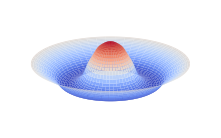
</div>

Radially symmetric (independent of $\theta$ in polar coordinates) transverse displacements $z(r,t)$ of such a membrane satisfy the polar wave equation
$$z_{tt}=a^2\left(z_{rr}+\frac{1}{r}z_r\right),\quad\text{for }0<r<c.$$
Having the membrane fixed at the frame gives us the boundary condition
$$z(c,t)=0,\quad\text{for }t\in [0,\infty),$$
and releasing it from rest with initial shape $z=f(r)$ gives us the initial conditions
$$z_t(r,0)=0,\quad z(r,0)=f(r),\quad\text{for }r\in [0,c].$$

After some work we found out that the solution is:

$$z(r,t)=\sum_{k=0}^\infty R_k(r)T_k(t)=\sum_{k=0}^\infty C_kJ_0\left(\frac{j_{0,k}r}{c}\right)\cos\frac{aj_{0,k} t}{c},$$

where $J_0$ is the *Bessel function* of first kind of order zero and where $j_{0,0},j_{0,1},j_{0,2},\ldots$ are the zeros of that function. It's up to you to figure out how to calculate the coefficients $C_k$.

# What this exercise is about.

We want to implement the $n$th partial sum
$$z_n(r,t)=\sum_{k=0}^{n-1} C_kJ_0\left(\frac{j_{0,k}r}{c}\right)\cos\frac{aj_{0,k} t}{c},$$
in Python.

To do this we have to derive an expression for $C_k$.

## How to find an expression for $C_k$.

Note that the initial condition 
$$z(r,0)=f(r),\quad r\in [0,r],$$
gives us
$$\sum_{k=0}^\infty C_kJ_0\left(\frac{j_{0,k}r}{c}\right)=f(r),\quad r\in [0,r].$$

Using the fact that the functions
$$R_k(r)=J_0\left(\frac{j_{0,k}r}{c}\right),\quad k=0,1,2,\ldots$$
are *orthogonal* with respect to the inner product
$$\langle f,g\rangle =\int_0^c f(r)g(r)\cdot r\,ds,\quad\textbf{Note the factor }r.$$
you can derive (or at least guess) a formula for $C_k$. **Do that!**

After deriving (or guessing) a formula for $C_k$ you can **implement it in Python**.


**You will be given some help with the technical details below**

# Let's calculate

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.special import jv
from scipy.special import jn_zeros

The Bessel function $J_0$ is avialable in `scipy.special` as `jv` and its zeros as `jn_zeros` (we imported them in the cell above).

To illustrate how it's used, the following code plots the functions
$$J_0\left(\frac{j_{0,k}r}{c}\right),\quad\text{for }k=0,\ldots,4$$
for
$$r\in [0,c],\quad c=1.$$


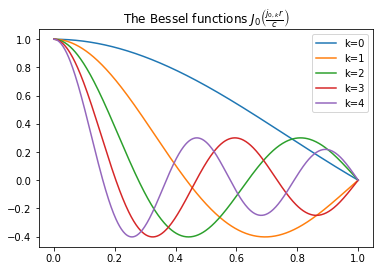

In [2]:
%matplotlib inline

j0 = jn_zeros(0,5)  # This creates an array with the first 5 numbers j_{0,k}
                      # Should you need more than 5, you can redefine this.
c=1
r = np.linspace(0,c,500)

for k in range(5) :
    y = jv(0,j0[k]*r/c)
    plt.plot(r,y,label='k={}'.format(k))
    plt.legend()

plt.title(r'The Bessel functions $J_0\left(\frac{j_{0,k}r}{c}\right)$')    
plt.show()

# Exercise

Implement the $n$th partial sum

$$z_n(r,t)=\sum_{k=0}^{n-1} C_kJ_0\left(\frac{j_{0,k}r}{c}\right)\cos\frac{aj_{0,k} t}{c},$$

as `z_membrane(f,a,c,n,r,t)`. Its arguments are
- `f` the inital state function $f(x)$
- `a` the constant $a$
- `c` the right endpoint of the interval $[0,c]$.
- `n` the number of terms in the sum.
- `r` the radial coordinate $r$ where we evaluate.
- `t` the point in time $t$ where we evaluate.

I have filled in most details for you, but you have to take care of calculating $C_k$.

- *Note* that the Bessel function $J_0(u)$ is available as `jv(0,u)`.
- *Note* that I have created an array `j0` with the first $n$ zeros of the Bessel function, so you can access the numbers $$j_{0,k},\quad k=0,\ldots n-1$$ as `j0[k]`.

This exercise is quite similar to what you did with Legendre polynomials in AE4. You might want to look back at that.

In [14]:
def z_membrane(f,a,c,n,r,t) :
    z = 0                     # Initialize z
    j0 = jn_zeros(0,n)      # Array with the first n zeros of the Bessel function
    for k in range(n) :
        Ck = (quad(lambda r: f(r) * jv(0,j0[k]*r/c) * r, 0, c)[0])/(quad(lambda r: (jv(0,j0[k]*r/c) ** 2) * r, 0, c)[0])               # Calculate C_k  (Fill in this part!)
        z=z+ Ck*jv(0,j0[k]*r/c)*np.cos(a*j0[k]*t/c)   # Add the k:th term to z
    return z     

# Testing

When you are done it's time to test your function. 

For that we need an initial function $f(r)$.

## Exercise
Let's say $c=1$, and let's define $f$ such that the initial shape of the membrane is the upper half sphere with radius $1$.

In [15]:
# Define f to be the initial shape of the membrane
# In our case the upper half sphere with radius 1.

def f(r):
    return np.sqrt(1 - (r**2))    # Return something appropriate (Fill in this part!)

Let's plot the corresponding membrane shape, to check that you got it right.

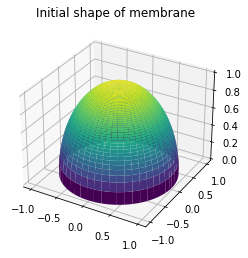

In [16]:
# Plot the corresponding initial membrane shape
%matplotlib inline

c = 1
numpoints = 100

r = np.linspace(0,c,numpoints)
theta = np.linspace(0,2*np.pi,numpoints)
rr,th = np.meshgrid(r,theta)
x = rr*np.cos(th)
y = rr*np.sin(th)
z = f(rr)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z,cmap='viridis')
ax.set_title('Initial shape of membrane')
plt.show()

Since 
$$z(r,0)=f(r),\quad r\in [0,c],$$
$z_n(r,0)$ should be a nice approximation of $f(r)$, when $n$ is big.

So we can *test* your code for `z(f,a,c,n,r,t)` by plotting it together with `f(r)` for, say, `n=10`.

Although it doesn't matter, we need a value for `a`. Let's use `a=1`.

If your code is correct, the two graphs should look similar.

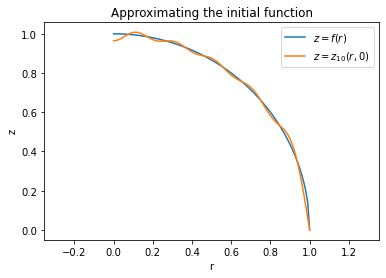

In [17]:
%matplotlib inline

a=1
c=1

n=10
z1 = f(r)
z2 = z_membrane(f,a,c,n,r,0)
plt.plot(r,z1,label='$z=f(r)$')
plt.plot(r,z2,label='$z=z_{10}(r,0)$')
plt.title('Approximating the initial function')
plt.legend()
plt.xlabel('r')
plt.ylabel('z')
plt.axis('equal')
plt.show()

# Exercise
Verify that the orange graph above is a decent approximation of the blue graph. If not, then something is wrong with your code for `z_membrane` and you should fix the error before proceeding.

# Let's make the membrane move!

Next, let's plot the resulting membrane shape at a few different points in time $t$, as given by your function `z_membrane`.

The plot will open in a new window. You should probably maximize it to see what happens.

Also, note that what's plotted are not exact solutions, but the 20th partial sum
$$z_n(r,t)=\sum_{k=1}^{20} C_kJ_0\left(\frac{j_{0,k}r}{c}\right)\cos\frac{aj_{0,k} t}{c},$$


In particular, for $t=0$ we get the 20th degree Bessel approximation for $f$.

Other than that, the solution behaves as we would expect. The membrane vibrates.

In [18]:
%matplotlib qt

a = 1          # The constant a 
c = 1          # Radius of membrane
n = 20         # Number of terms in Bessel approximation


numpoints=100  # Number of points along each axis (so totally numpoints x numpoints points to plot)
frames = 12    # Number of different figures in plot
j00 = jn_zeros(0,1)[0]    # Let j00 be the first zero of the Bessel function.
maxtime = 3*np.pi/j00/a

r = np.linspace(0,1,numpoints)
theta = np.linspace(0,2*np.pi,numpoints)
rr,th = np.meshgrid(r,theta)
x = rr*np.cos(th)
y = rr*np.sin(th)

fig = plt.figure()

for k in range(frames) :
    time = k/(frames-1)*maxtime
    timetext = 'Time = ' + str(np.round(time,2))
    zz = z_membrane(f,a,c,n,rr,time)
    ax = fig.add_subplot(3,4, k+1, projection='3d')
    ax.plot_surface(x,y,zz,cmap=cm.viridis)
    plt.title(timetext)
    ax.set_zlim(-1.01, 1.01)
    ax.set_axis_off()

plt.show()


Our last cell below plots an animation of the vibrating membrane. Enjoy!
(The plot might take a little while to render)

In [12]:
%matplotlib qt

a = 1                     # The constant a
c = 1                     # Radius of membrane
n = 20

numpoints = 50            # Number of points for numpoints x numpoints grid.
fps = 20                  # frames per sec
frn = 200                 # number of frames of the animation
j00 = jn_zeros(0,1)[0]    # Let j00 be the first zero of the Bessel function.
maxtime = 6*np.pi/j00/a   # Maximum value of t for animation

zarray = np.zeros((numpoints, numpoints, frn))

r = np.linspace(0,1,numpoints)
theta = np.linspace(0,2*np.pi,numpoints)
rr,th = np.meshgrid(r,theta)
x = rr*np.cos(th)
y = rr*np.sin(th)

for i in range(frn):
    zarray[:,:,i] = z_membrane(f,a,c,20,rr,i/frn*maxtime)

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(x, y, zarray[:,:,frame_number], cmap="viridis")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_zlim(-1.01, 1.2)
ax.set_axis_off()

plot = [ax.plot_surface(x, y, zarray[:,:,0], color='0.75', rstride=1, cstride=1)]

ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(zarray, plot), interval=1000/fps)

plt.show()

# To submit in LAMS

1. Your code for `z_membrane`
2. The plot with the 12 graphs (the membrane at 12 different points in time).